In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = 'https://www.wunderground.com/dashboard/pws/KTXDALLA577/table/2021-01-01/2021-01-01/daily'

In [3]:
rweather = requests.get(url)

In [4]:
html = rweather.content

In [5]:
#rweather.text

In [6]:
htmldf = pd.read_html(html)

In [7]:
htmldf[-1]

,Time,Temperature,Dew Point,Humidity,Wind,Speed,Gust,Pressure,Precip. Rate.,Precip. Accum.,UV,Solar
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12:04 AM,38.1 °F,37.8 °F,99 °%,NW,2.7 °mph,3.4 °mph,29.01 °in,0.00 °in,0.00 °in,0.0,0 w/m²
2,12:09 AM,38.1 °F,37.8 °F,99 °%,NW,2.7 °mph,3.4 °mph,29.01 °in,0.00 °in,0.00 °in,0.0,0 w/m²
3,12:14 AM,38.1 °F,37.8 °F,99 °%,NW,2.7 °mph,3.4 °mph,29.01 °in,0.00 °in,0.00 °in,0.0,0 w/m²
4,12:19 AM,--,--,--,North,--,--,29.01 °in,0.00 °in,0.00 °in,NaN,w/m²
...,...,...,...,...,...,...,...,...,...,...,...,...
284,11:39 PM,38.1 °F,34.7 °F,88 °%,NE,1.1 °mph,1.1 °mph,29.55 °in,0.00 °in,0.00 °in,0.0,0 w/m²
285,11:44 PM,38.1 °F,34.7 °F,88 °%,NE,1.1 °mph,1.1 °mph,29.55 °in,0.00 °in,0.00 °in,0.0,0 w/m²
286,11:49 PM,38.1 °F,34.7 °F,88 °%,NNE,2.6 °mph,3.7 °mph,29.55 °in,0.00 °in,0.00 °in,0.0,0 w/m²
287,11:54 PM,38.3 °F,34.7 °F,87 °%,North,3.4 °mph,3.9 °mph,29.55 °in,0.00 °in,0.00 °in,0.0,0 w/m²


In [8]:
start_date = '2021-01-01'
#start_date = '2021-04-28'
end_data = '2021-10-21'
station = 'KILDALTO3'
station = 'KNYNEWYO1115'
station = 'KNYNEWYO1238'
station= 'KNYNEWYO1343'
station = 'KNJHILLS84' # No data
station = 'KNJSCOTC16'
station = 'KTXDALLA817'
station = 'KTXDALLA892'
station = 'KTXDALLA839'
station ='KTXDALLA626'
station = 'KTXDALLA835'
station = 'KTXCOPPE63'
station = 'KTXLEWIS161'
station = 'KTXFLOWE263'
station = 'KTXLEWIS120'
station = 'KTXFLOWE154'
station = 'KTXARGYL108'
station = 'KTXDENTO213'
station = 'KTXDALLA390'
station = 'KTXDALLA176'
station = 'KTXDALLA743'
station = 'KTXDALLA580'
station = 'KTXDALLA478'
station = 'KTXDALLA724'
station = 'KTXDALLA577'
#  station = 'KILWELDO6' # No Data
#  station = 'KILMOUNT18'

date_range = pd.date_range(start=start_date, end=end_data)

weatherdata = pd.DataFrame()

for dates in date_range:
  #try:
    #print(str(dates.date()))
    url = 'https://www.wunderground.com/dashboard/pws/'+station+'/table/'+str(dates.date())+'/'+str(dates.date())+'/daily'

    #print(url)
    
    rweather = requests.get(url)
    html = rweather.content
    htmldf = pd.read_html(html)
    df = htmldf[-1]
    '''
    for x in [['Temperature','°F'], ['Dew Point', '°F'], ['Humidity','°%'], ['Wind Speed','°mph'], 
              ['Wind Gust','°mph'],['Pressure','°in'], ['Precip.','°in']]:
        dfx = df[x[0]]
        df[x[0]] = dfx.str.strip(x[1])
    
    df['Temperature'] = (df['Temperature'].astype('float')-32.)*5.0/9
    df['Dew Point'] = (df['Dew Point'].astype('float')-32.)*5.0/9
    
    df = df.dropna()
    
    df['Time'] = pd.to_datetime(df['Time']).dt.strftime('%H:%M:%S')
    
    df.loc[:,'DATE'] = str(dates.date())
    
    df['DateTime'] = df['DATE'] + ' ' + df['Time']
    df['DateTime'] = pd.to_datetime(df['DateTime']).dt.strftime('%Y-%m-%d %H:%M:%S')
    '''
    
    df['Date'] = dates.date() 

    weatherdata = weatherdata.append(df)
    

  #except:
    #print('something went wrong on ' + str(dates.date()))

weatherdata.dropna(thresh=5)

weatherdata.to_csv(station+'_wunderground_'+start_date+'_'+end_data+'.csv', index=False)

In [9]:
str(dates.date())

'2021-10-21'

In [10]:
weatherdata.to_csv(station+'_wunderground_'+start_date+'_'+str(dates.date())+'.csv', index=False)

In [11]:
df

,Time,Temperature,Dew Point,Humidity,Wind,Speed,Gust,Pressure,Precip. Rate.,Precip. Accum.,UV,Solar,Date
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-21
1,12:04 AM,69.6 °F,66.9 °F,91 °%,ESE,0.0 °mph,0.0 °mph,29.44 °in,0.00 °in,0.00 °in,0.0,0 w/m²,2021-10-21
2,12:09 AM,--,--,--,North,--,--,29.44 °in,0.00 °in,0.00 °in,NaN,w/m²,2021-10-21
3,12:14 AM,--,--,--,North,--,--,29.44 °in,0.00 °in,0.00 °in,NaN,w/m²,2021-10-21
4,12:19 AM,--,--,--,North,--,--,29.44 °in,0.00 °in,0.00 °in,NaN,w/m²,2021-10-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,11:23 PM,68.4 °F,51.6 °F,55 °%,NE,0.0 °mph,0.0 °mph,29.50 °in,0.00 °in,0.00 °in,0.0,0 w/m²,2021-10-21
271,11:28 PM,68.4 °F,51.6 °F,55 °%,NE,0.0 °mph,0.0 °mph,29.50 °in,0.00 °in,0.00 °in,0.0,0 w/m²,2021-10-21
272,11:31 PM,68.4 °F,51.6 °F,55 °%,NE,0.0 °mph,0.0 °mph,29.49 °in,0.00 °in,0.00 °in,0.0,0 w/m²,2021-10-21
273,11:42 PM,--,--,--,North,--,--,29.49 °in,0.00 °in,0.00 °in,NaN,w/m²,2021-10-21


In [12]:
weatherdata['Date']

0      2021-01-01
1      2021-01-01
2      2021-01-01
3      2021-01-01
4      2021-01-01
          ...    
270    2021-10-21
271    2021-10-21
272    2021-10-21
273    2021-10-21
274    2021-10-21
Name: Date, Length: 71618, dtype: object

In [13]:
datadf = pd.read_csv('KNYNEWYO1238_wunderground_2018-07-16_2020-03-24.csv') # Urban
datadfNYC02 = pd.read_csv('KNYNEWYO1343_wunderground_2020-05-25_2020-10-31.csv') #Urbanish
datadfNYC03 = pd.read_csv('KNYNEWYO1238_wunderground_2020-03-25_2020-06-21.csv') #Urbanish
datadfRural = pd.read_csv('KILMOUNT18_wunderground_2018-10-24_2021-01-08.csv') #"Rural"
datadfRural02 = pd.read_csv('KILDALTO3_wunderground_2018-06-01_2019-03-09.csv') #Ruralish
datadfDALLA817 = pd.read_csv('KTXDALLA817_wunderground_2021-01-01_2021-10-21.csv') # Urban
datadfDALLA892 = pd.read_csv('KTXDALLA892_wunderground_2021-01-01_2021-09-21.csv') # Urban

FileNotFoundError: [Errno 2] No such file or directory: 'KNYNEWYO1238_wunderground_2018-07-16_2020-03-24.csv'

In [ ]:
datadfRural02

,Time,Temperature,Dew Point,Humidity,Wind,Speed,Gust,Pressure,Precip. Rate.,Precip. Accum.,UV,Solar,Date
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-06-01
1,12:04 AM,67.8 °F,65.0 °F,91 °%,South,2.8 °mph,4.0 °mph,29.81 °in,0.00 °in,0.00 °in,NaN,w/m²,2018-06-01
2,12:09 AM,67.8 °F,65.0 °F,91 °%,South,2.8 °mph,4.0 °mph,29.81 °in,0.00 °in,0.00 °in,NaN,w/m²,2018-06-01
3,12:14 AM,67.8 °F,65.0 °F,91 °%,South,2.6 °mph,3.0 °mph,29.81 °in,0.00 °in,0.00 °in,NaN,w/m²,2018-06-01
4,12:19 AM,67.8 °F,64.0 °F,90 °%,SSE,3.7 °mph,5.0 °mph,29.81 °in,0.00 °in,0.00 °in,NaN,w/m²,2018-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80988,11:39 PM,33.9 °F,31.0 °F,83 °%,WNW,5.3 °mph,6.4 °mph,30.32 °in,0.00 °in,0.00 °in,NaN,w/m²,2019-03-09
80989,11:44 PM,34.0 °F,31.0 °F,84 °%,WNW,5.3 °mph,6.6 °mph,30.32 °in,0.00 °in,0.00 °in,NaN,w/m²,2019-03-09
80990,11:49 PM,34.0 °F,31.0 °F,84 °%,WNW,4.9 °mph,6.0 °mph,30.32 °in,0.00 °in,0.00 °in,NaN,w/m²,2019-03-09
80991,11:54 PM,33.9 °F,31.0 °F,83 °%,WNW,4.5 °mph,5.6 °mph,30.32 °in,0.00 °in,0.00 °in,NaN,w/m²,2019-03-09


In [ ]:
for x in [['Temperature','°F'], ['Dew Point', '°F'], ['Humidity','°%'], ['Speed','°mph'], 
              ['Gust','°mph'],['Pressure','°in'], ['Precip. Rate.','°in'], ['Precip. Accum.','°in']]:
    dfx = datadf[x[0]]
    datadf[x[0]] = dfx.str.strip(x[1])
    dfy = datadfRural[x[0]]
    datadfRural[x[0]] = dfy.str.strip(x[1])
    dfy = datadfRural02[x[0]]
    datadfRural02[x[0]] = dfy.str.strip(x[1])
    dfx = datadfNYC03[x[0]]
    datadfNYC03[x[0]] = dfx.str.strip(x[1])
    dfx = datadfDALLA817[x[0]]
    datadfDALLA817[x[0]] = dfx.str.strip(x[1])
    dfx = datadfDALLA892[x[0]]
    datadfDALLA892[x[0]] = dfx.str.strip(x[1])

In [ ]:
datadf = datadf.dropna()
datadfNYC02 = datadfNYC02.dropna()
datadfNYC03 = datadfNYC03.dropna()
datadfRural = datadfRural.dropna()
datadfRural02 = datadfRural02.dropna(thresh=3)
datadfDALLA817= datadfDALLA817.dropna(thresh=3)
datadfDALLA892= datadfDALLA892.dropna(thresh=3)

In [ ]:
datadfDALLA817 = datadfDALLA817.replace(to_replace='--', value=np.nan)
datadfDALLA892 = datadfDALLA892.replace(to_replace='--', value=np.nan)

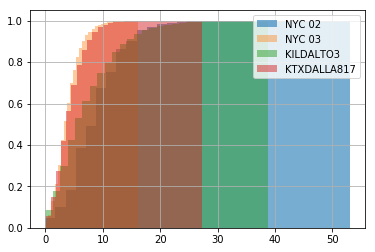

In [ ]:
#datadf['Speed'].astype(float).hist(bins=30, density=True, alpha =0.4, label='NYC 01',cumulative=True)
datadfNYC02['Wind Speed'].astype(float).hist(bins=30, density=True, alpha =0.6, label='NYC 02',cumulative=True)
datadfNYC03['Speed'].astype(float).hist(bins=30, density=True, alpha =0.4, label='NYC 03',cumulative=True)
#datadfRural['Speed'].astype(float).hist(bins=30, density=True, alpha=0.5, label='KILMOUNT',cumulative=True)
datadfRural02['Speed'].astype(float).hist(bins=30, density=True, alpha=0.5, label='KILDALTO3',cumulative=True)
datadfDALLA817['Speed'].astype(float).hist(bins=30, density=True, alpha=0.5, label='KTXDALLA817',cumulative=True)
ax = plt.gca()
ax.legend(loc='upper right')

In [ ]:
datadf['Wind']

541        ESE
542       East
543       East
544       East
545        ESE
         ...  
22269      NNW
22270    North
22271      NNW
22272      NNW
22273      NNW
Name: Wind, Length: 13647, dtype: object

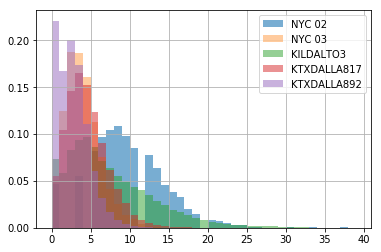

In [ ]:
bins=np.arange(0,40,1)*1.0
#datadf['Speed'].astype(float).hist(bins=30, density=True, alpha =0.4, label='NYC 01',cumulative=False)
datadfNYC02['Wind Speed'].astype(float).hist(bins=bins, density=True, alpha =0.6, label='NYC 02',cumulative=False)
datadfNYC03['Speed'].astype(float).hist(bins=bins, density=True, alpha =0.4, label='NYC 03',cumulative=False)
#datadfRural['Speed'].astype(float).hist(bins=30, density=True, alpha=0.5, label='KILMOUNT',cumulative=False)
datadfRural02['Speed'].astype(float).hist(bins=bins, density=True, alpha=0.5, label='KILDALTO3',cumulative=False)
datadfDALLA817['Speed'].astype(float).hist(bins=bins, density=True, alpha=0.5, label='KTXDALLA817',cumulative=False)
datadfDALLA892['Speed'].astype(float).hist(bins=bins, density=True, alpha=0.5, label='KTXDALLA892',cumulative=False)
ax = plt.gca()
ax.legend(loc='upper right')

In [ ]:
windDirReplacementDict = {'North':0, 'NNE':1, 'NE':2, 'ENE':3, 
                          'East':4, 'ESE':5, 'SE':6, 'SSE':7,
                          'South':8, 'SSW':9, 'SW':10, 'WSW':11,
                          'West':12, 'WNW':13, 'NW':14, 'NNW':15}

datadfRural = datadfRural.replace(windDirReplacementDict)
datadfNYC03 = datadfNYC03.replace(windDirReplacementDict)
datadfNYC01 = datadf.replace(windDirReplacementDict)

In [ ]:
import numpy as np

In [ ]:
histToPlot = np.histogram(datadfRural['Wind'], density=True, bins=np.arange(17))
histToPlotNYC03 = np.histogram(datadfNYC03['Wind'], density=True, bins=np.arange(17))
histToPlotNYC01 = np.histogram(datadfNYC01['Wind'], density=True, bins=np.arange(17))

In [ ]:
histToPlot

(array([0.02976355, 0.04795393, 0.09161637, 0.03812503, 0.02835151,
        0.05025195, 0.12816324, 0.09241929, 0.07655463, 0.02115289,
        0.04933828, 0.08801706, 0.10698267, 0.04391162, 0.07334293,
        0.03405504]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]))

In [ ]:
histToPlot[0].sum()

1.0

<BarContainer object of 16 artists>

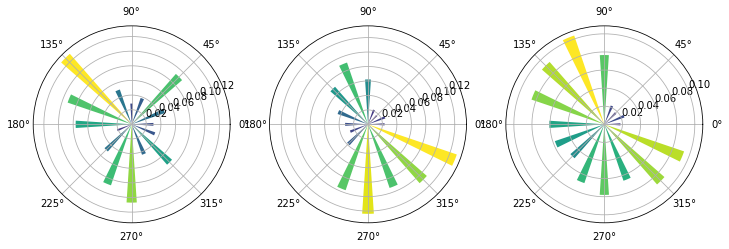

In [ ]:
f, (ax1,ax2, ax3) =plt.subplots(nrows=1, ncols=3, subplot_kw={'projection': 'polar'}, figsize=(12,20))

colors = plt.cm.viridis(histToPlot[0]/histToPlot[0].max())

#ax1.(projection='polar')
ax1.bar((np.arange(16))/16.0*2*np.pi, histToPlot[0], color=colors, width = np.ones(16)*np.pi/24)

colorsNYC01 = plt.cm.viridis(histToPlotNYC01[0]/histToPlotNYC01[0].max())
ax2.bar((np.arange(16))/16.0*2*np.pi, histToPlotNYC01[0], color=colorsNYC01, width = np.ones(16)*np.pi/24)

colorsNYC03 = plt.cm.viridis(histToPlotNYC03[0]/histToPlotNYC03[0].max())
ax3.bar((np.arange(16))/16.0*2*np.pi, histToPlotNYC03[0], color=colorsNYC03, width = np.ones(16)*np.pi/24)

In [ ]:
datadfDALLA892['Speed'].astype(float).dropna()

1        2.7
2        2.8
3        2.4
4        2.7
5        3.0
        ... 
44141    2.9
44142    2.1
44143    2.5
44144    3.0
44145    3.9
Name: Speed, Length: 43883, dtype: float64

In [ ]:
stationList = ['KTXDALLA390', 'KTXDALLA176', 'KTXDALLA743', 'KTXDALLA580', 'KTXDALLA478', 
               'KTXDALLA724', 'KTXDALLA577']